

*Submitted by:*

**Christian Elijah Darvin**

BCS32

College of Information and Computer Studies - De La Salle University Dasmariñas

In [146]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"OpenCV Version: {cv.__version__}")
print(f"Seaborn Version: {sns.__version__}")

NumPy Version: 2.1.1
Matplotlib Version: 3.10.0
OpenCV Version: 4.11.0
Seaborn Version: 0.13.2


In [147]:
def check_if_image_loaded(img):
    if img is not None:
        print("Image loaded successfully!")
    else:
        print("Failed to load image.")

### Section A: Image Acquisition & Noise Identification 

Image loaded successfully!


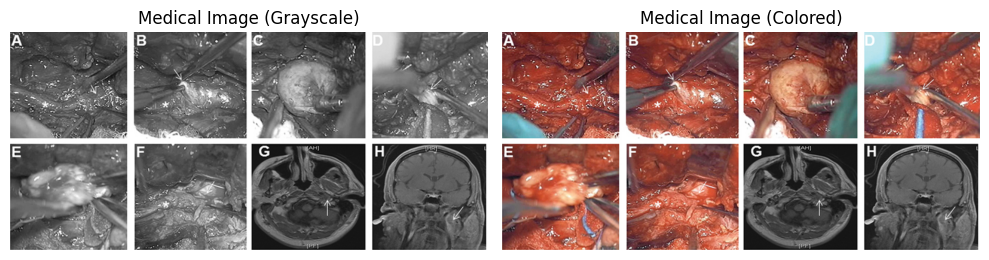

In [148]:
img = cv.imread("./images/medical-image.jpg")
img_grayscale = cv.imread("./images/medical-image.jpg", cv.IMREAD_GRAYSCALE)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

check_if_image_loaded(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 12))


axes[0].imshow(img_grayscale, cmap="gray")
axes[0].set_title("Medical Image (Grayscale)")
axes[0].axis("off")


axes[1].imshow(img_rgb)
axes[1].set_title("Medical Image (Colored)")
axes[1].axis("off")


plt.tight_layout()
plt.show()

In [149]:
def add_gaussian_noise(img, mean=0, std=25):
    noise = np.random.normal(mean, std, img.shape).astype(np.int16)
    noisy_img = img.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.int16)
    return noisy_img


def add_rayleigh_noise(img, scale=30):
    noise = np.random.rayleigh(scale, img.shape).astype(np.int16)
    noisy_img = img.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img


def add_erlang_noise(img, shape_param=5, scale=10):
    noise = np.random.gamma(shape_param, scale, img.shape).astype(np.int16)
    noisy_img = img.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img


def add_exponential_noise(img, scale=50):
    noise = np.random.exponential(scale, img.shape).astype(np.int16)
    noisy_img = img.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img


def add_uniform_noise(img, low=0, high=50):
    noise = np.random.uniform(low, high, img.shape).astype(np.int16)
    noisy_img = img.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

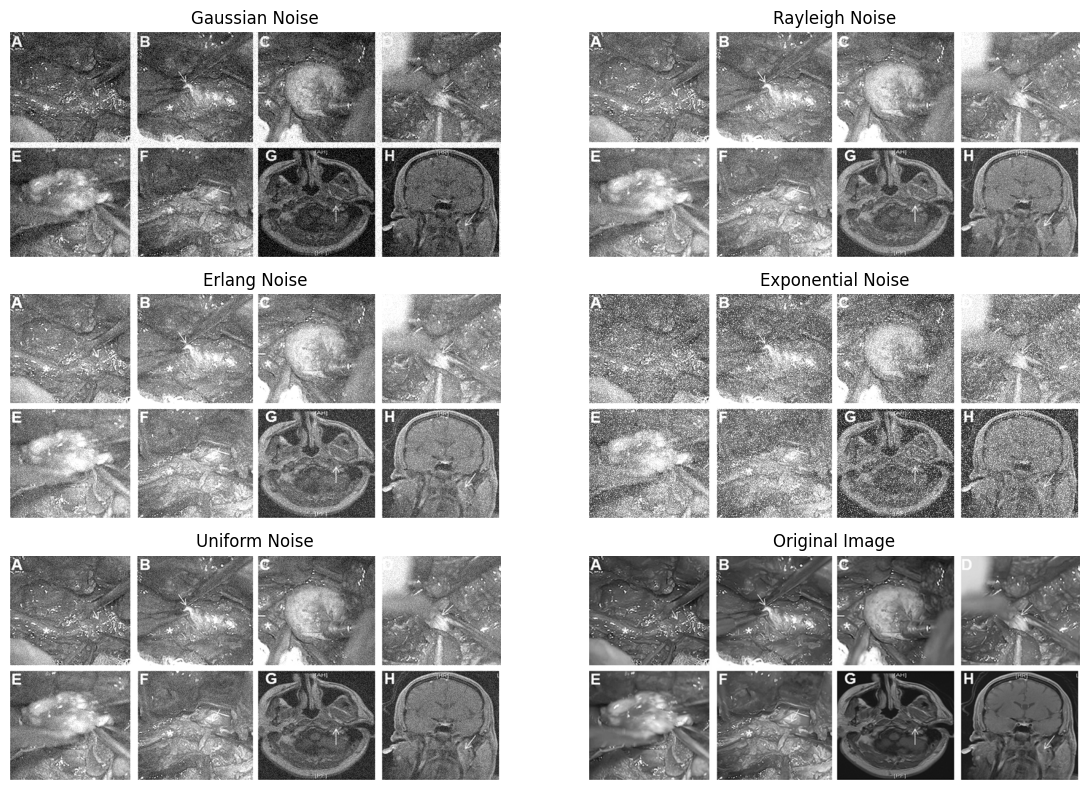

In [150]:
gaussian_noisy = add_gaussian_noise(img_grayscale)
rayleigh_noisy = add_rayleigh_noise(img_grayscale)
erlang_noisy = add_erlang_noise(img_grayscale)
exponential_noisy = add_exponential_noise(img_grayscale)
uniform_noisy = add_uniform_noise(img_grayscale)

fig, axes = plt.subplots(3, 2, figsize=(12, 8))


axes[0, 0].imshow(gaussian_noisy, cmap="gray")
axes[0, 0].set_title("Gaussian Noise")
axes[0, 0].axis("off")

axes[0, 1].imshow(rayleigh_noisy, cmap="gray")
axes[0, 1].set_title("Rayleigh Noise")
axes[0, 1].axis("off")


axes[1, 0].imshow(erlang_noisy, cmap="gray")
axes[1, 0].set_title("Erlang Noise")
axes[1, 0].axis("off")

axes[1, 1].imshow(exponential_noisy, cmap="gray")
axes[1, 1].set_title("Exponential Noise")
axes[1, 1].axis("off")


axes[2, 0].imshow(uniform_noisy, cmap="gray")
axes[2, 0].set_title("Uniform Noise")
axes[2, 0].axis("off")

axes[2, 1].imshow(img_grayscale, cmap="gray")
axes[2, 1].set_title("Original Image")
axes[2, 1].axis("off")

plt.tight_layout()
plt.show()

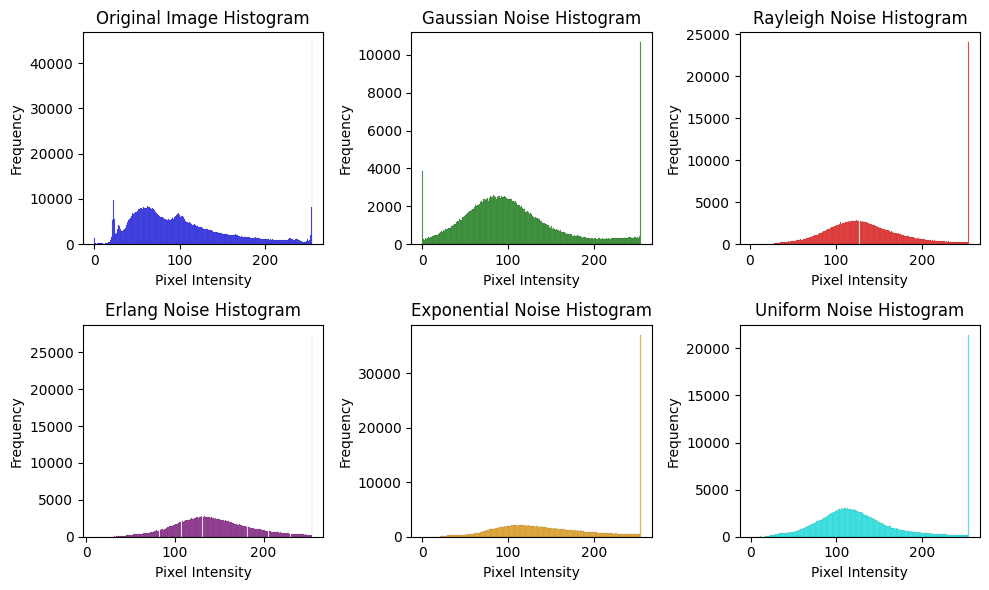

In [151]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))


def plot_histogram(img, title, color, ax):
    sns.histplot(img.ravel(), bins=256, color=color, alpha=0.7, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Pixel Intensity")
    ax.set_ylabel("Frequency")


plot_histogram(img_rgb, "Original Image Histogram", "blue", axes[0, 0])
plot_histogram(gaussian_noisy, "Gaussian Noise Histogram", "green", axes[0, 1])
plot_histogram(rayleigh_noisy, "Rayleigh Noise Histogram", "red", axes[0, 2])
plot_histogram(erlang_noisy, "Erlang Noise Histogram", "purple", axes[1, 0])
plot_histogram(exponential_noisy, "Exponential Noise Histogram", "orange", axes[1, 1])
plot_histogram(uniform_noisy, "Uniform Noise Histogram", "cyan", axes[1, 2])


plt.tight_layout()
plt.show()

### Section B: Color Models & Transformations

Image loaded successfully!


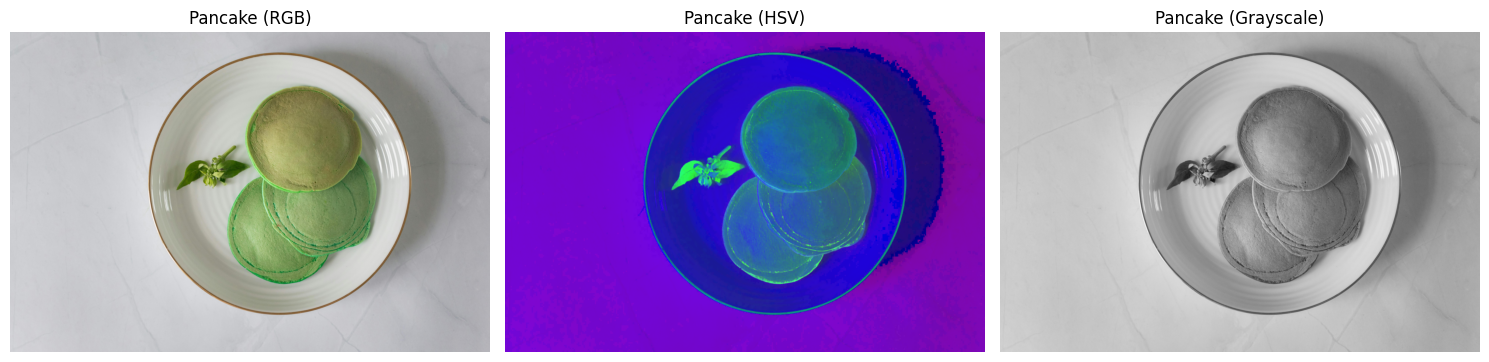

In [152]:
pancake = cv.imread("./images/pancake.jpg")
check_if_image_loaded(pancake)

pancake_rgb = cv.cvtColor(pancake, cv.COLOR_BGR2RGB)
pancake_hsv = cv.cvtColor(pancake, cv.COLOR_BGR2HSV)
pancake_grayscale = cv.cvtColor(pancake, cv.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pancake_rgb)
axes[0].set_title("Pancake (RGB)")
axes[0].axis("off")

axes[1].imshow(pancake_hsv)
axes[1].set_title("Pancake (HSV)")
axes[1].axis("off")

axes[2].imshow(pancake_grayscale, cmap="gray")
axes[2].set_title("Pancake (Grayscale)")
axes[2].axis("off")

plt.tight_layout()
plt.show()

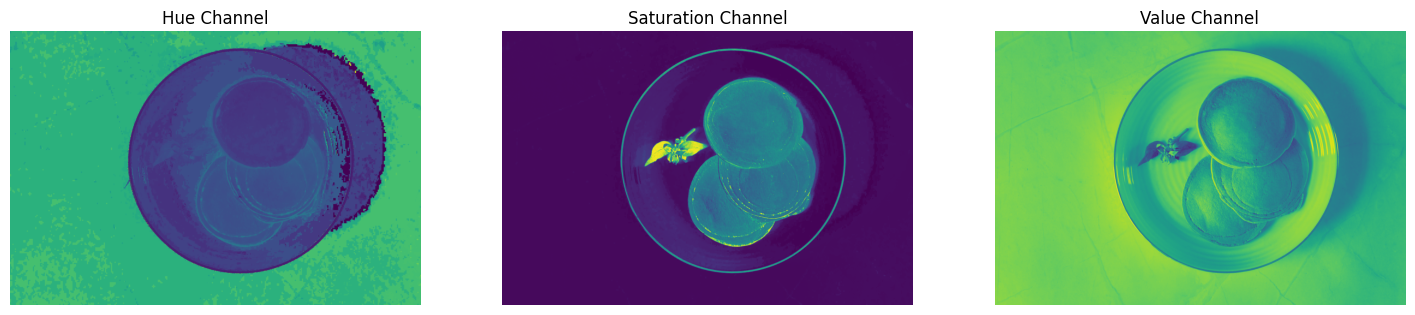

In [153]:
hue, saturation, value = cv.split(pancake_hsv)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(hue)
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(saturation)
plt.title("Saturation Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(value)
plt.title("Value Channel")
plt.axis("off")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

r, g, b = cv.split(pancake_rgb)
r = r.flatten()
g = g.flatten()
b = b.flatten()

ax.scatter(r, g, b, c=np.stack((r, g, b), axis=1) / 255.0, marker=".")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.title("3D RGB Color Model")
plt.show()

In [ ]:
scale_factor = 5.5
scaled_dim = (
    int(pancake_rgb.shape[1] * scale_factor),
    int(pancake_rgb.shape[0] * scale_factor),
)
scaled_img = cv.resize(pancake_rgb, scaled_dim)

center = (pancake_rgb.shape[1] // 2, pancake_rgb.shape[0] // 2)
rotation_matrix = cv.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv.warpAffine(
    pancake_rgb,
    rotation_matrix,
    (pancake_rgb.shape[1], pancake_rgb.shape[0]),
)

translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]])
translated_image = cv.warpAffine(
    pancake_rgb,
    translation_matrix,
    (pancake_rgb.shape[1], pancake_rgb.shape[0]),
)

reflected_image = cv.flip(pancake_rgb, 1)

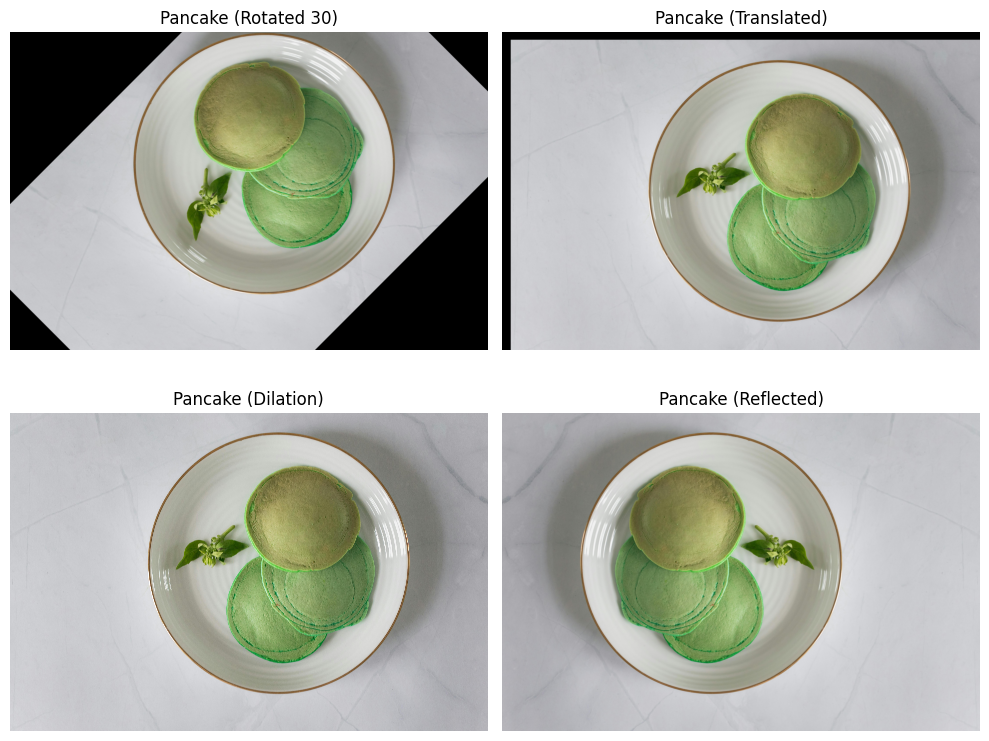

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(rotated_image)
axes[0, 0].set_title("Pancake (Rotated 30)")
axes[0, 0].axis("off")

axes[0, 1].imshow(translated_image)
axes[0, 1].set_title("Pancake (Translated)")
axes[0, 1].axis("off")

axes[1, 0].imshow(scaled_img)
axes[1, 0].set_title("Pancake (Dilation)")
axes[1, 0].axis("off")

axes[1, 1].imshow(reflected_image)
axes[1, 1].set_title("Pancake (Reflected)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

### Section C: Image Interpolation & Statistical Analysis

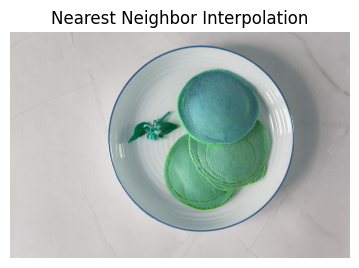

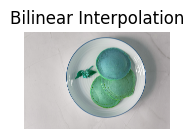

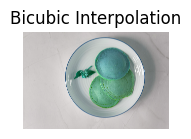

In [ ]:
methods = {
    "Nearest Neighbor": cv.INTER_NEAREST,
    "Bilinear": cv.INTER_LINEAR,
    "Bicubic": cv.INTER_CUBIC,
}

new_size = (400, 400)
plt.figure(figsize=(15, 10))

for idx, (method_name, method) in enumerate(methods.items(), start=1):
    resized_img = cv.resize(pancake_rgb, new_size, interpolation=method)

    plt.subplot(3, 3, idx)
    plt.imshow(pancake_rgb)
    plt.title(f"{method_name} Interpolation")
    plt.axis("off")
    plt.show()

In [ ]:
def compute_metrics(image):
    mean_val = np.mean(image)
    std_val = np.std(image)
    contrast = np.max(image) - np.min(image)
    return mean_val, std_val, contrast


print("== Before Applying Exponential Noise ==\n")

for idx, (method_name, method) in enumerate(methods.items(), start=1):
    resized_img = cv.resize(pancake_rgb, new_size, interpolation=method)

    # Compute metrics
    mean, std, contrast = compute_metrics(resized_img)
    print(
        f"{method_name} Interpolation\nMean: {mean:.2f}, Std: {std:.2f}, Contrast: {contrast}\n"
    )

== Before Applying Exponential Noise ==

Nearest Neighbor Interpolation
Mean: 175.13, Std: 38.99, Contrast: 255

Bilinear Interpolation
Mean: 174.97, Std: 38.90, Contrast: 255

Bicubic Interpolation
Mean: 175.08, Std: 38.99, Contrast: 255



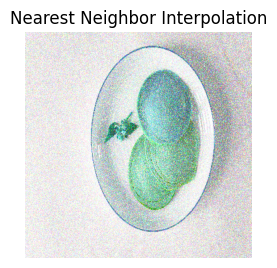

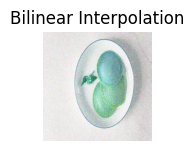

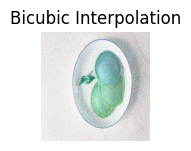

In [ ]:
methods = {
    "Nearest Neighbor": cv.INTER_NEAREST,
    "Bilinear": cv.INTER_LINEAR,
    "Bicubic": cv.INTER_CUBIC,
}

new_size = (400, 400)
plt.figure(figsize=(15, 10))

for idx, (method_name, method) in enumerate(methods.items(), start=1):
    expo_noise = add_exponential_noise(pancake_rgb)
    resized_img = cv.resize(expo_noise, new_size, interpolation=method)

    plt.subplot(3, 3, idx)
    plt.imshow(resized_img)
    plt.title(f"{method_name} Interpolation")
    plt.axis("off")
    plt.show()

In [ ]:
print("== After Applying Exponential Noise ==\n")

for idx, (method_name, method) in enumerate(methods.items(), start=1):
    resized_img = cv.resize(expo_noise, new_size, interpolation=method)

    # Compute metrics
    mean, std, contrast = compute_metrics(resized_img)
    print(
        f"{method_name} Interpolation\nMean: {mean:.2f}, Std: {std:.2f}, Contrast: {contrast}\n"
    )

== After Applying Exponential Noise ==

Nearest Neighbor Interpolation
Mean: 212.09, Std: 42.99, Contrast: 255

Bilinear Interpolation
Mean: 211.97, Std: 37.72, Contrast: 252

Bicubic Interpolation
Mean: 211.79, Std: 40.31, Contrast: 255



### Section D: Advanced Image Processing

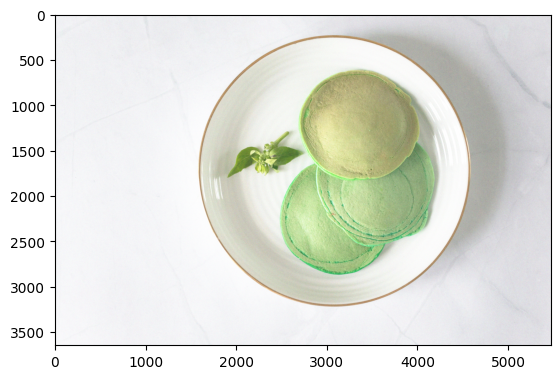

In [ ]:
erlang_noise = add_erlang_noise(pancake_rgb)
plt.imshow(erlang_noise)

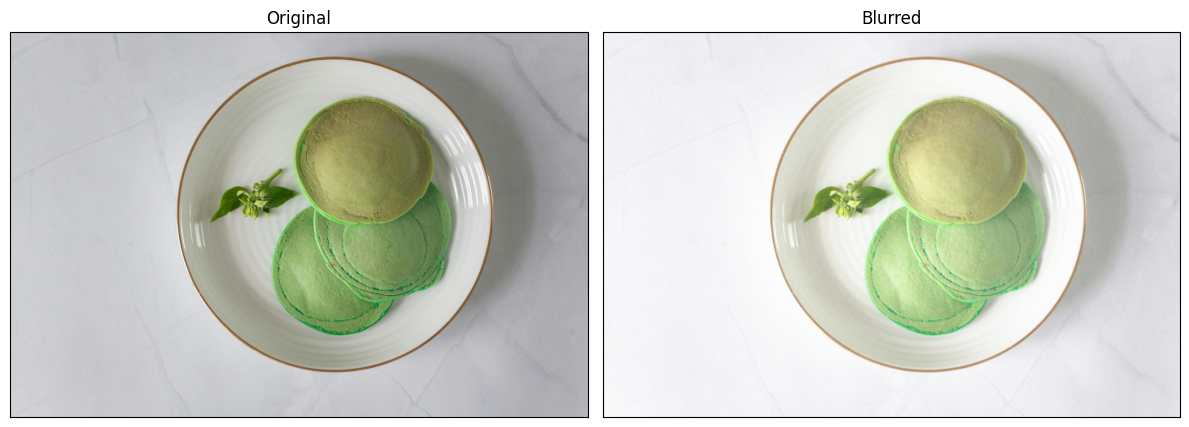

In [ ]:
blur = cv.blur(erlang_noise, (10, 10))

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(pancake_rgb)
plt.title("Original")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title("Blurred")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

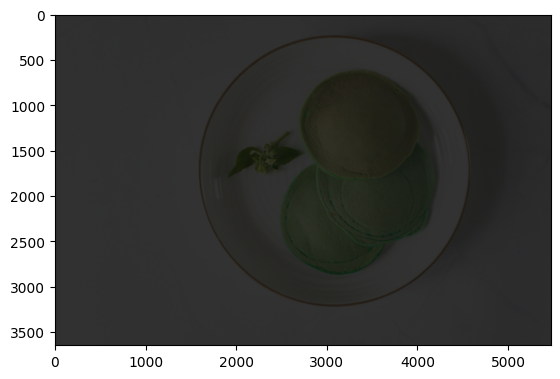

In [ ]:
gaussian_kernel = np.ones((1, 1), np.float32) / 5
conv_gaussian = cv.filter2D(blur, -1, gaussian_kernel, borderType=cv.BORDER_CONSTANT)
plt.imshow(conv_gaussian)